# ASAP Model Training Visualization and Analysis

This notebook visualizes the trained model results and prepares analysis for reporting.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load Training History

In [ ]:
history = pd.read_csv('trainedASAP/histories/history_log.csv')
print(f"Training ran for {len(history)} epochs")
print(f"\nBest validation loss: {history['val_loss'].min():.4f} at epoch {history['val_loss'].idxmin()}")
print(f"Final training loss: {history['loss'].iloc[-1]:.4f}")
print(f"Final validation loss: {history['val_loss'].iloc[-1]:.4f}")

history.head()

Training ran for 40 epochs

Best validation loss: 2.6283 at epoch 36
Final training loss: 3.7403
Final validation loss: 2.6452


,epoch,loss,lr,tf.compat.v1.squeeze_1_loss,tf.compat.v1.squeeze_2_loss,tf.compat.v1.squeeze_3_loss,tf.compat.v1.squeeze_4_loss,tf.compat.v1.squeeze_5_loss,tf.compat.v1.squeeze_6_loss,tf.compat.v1.squeeze_loss,...,val_tf.compat.v1.squeeze_3_loss,val_tf.compat.v1.squeeze_4_loss,val_tf.compat.v1.squeeze_5_loss,val_tf.compat.v1.squeeze_6_loss,val_tf.compat.v1.squeeze_loss,val_tf.identity_1_loss,val_tf.identity_2_loss,val_tf.identity_3_loss,val_tf.identity_4_loss,val_tf.identity_loss
0,0,5.869535,0.001,0.228737,0.350829,0.308798,0.394648,1.262789,0.279627,0.318345,...,0.187825,0.369388,1.587683,0.242413,0.303715,0.338821,0.024257,0.009477,0.007133,0.031614
1,0,4.841540,0.001,0.231637,0.354682,0.237558,0.398761,0.406604,0.284582,0.323759,...,0.212451,0.378475,0.543815,0.250548,0.326060,0.339177,0.025509,0.014291,0.010440,0.035177
2,1,4.443736,0.001,0.216250,0.341157,0.214515,0.388039,0.393581,0.271409,0.308348,...,0.195622,0.374753,0.545204,0.247643,0.313332,0.321989,0.031457,0.011674,0.010168,0.037159
3,2,4.533063,0.001,0.225713,0.345439,0.226295,0.391403,0.396290,0.274447,0.319859,...,0.192308,0.371145,0.531113,0.250321,0.314665,0.327889,0.022990,0.009513,0.008267,0.029262
4,3,4.396373,0.001,0.226100,0.345299,0.225809,0.392053,0.398395,0.273376,0.322869,...,0.194987,0.368581,0.527431,0.250837,0.323475,0.339491,0.020813,0.009791,0.009231,0.028254


## 3. Feature-Specific Losses

Analyze how well the model predicts different features (rotation, AUs, gaze).

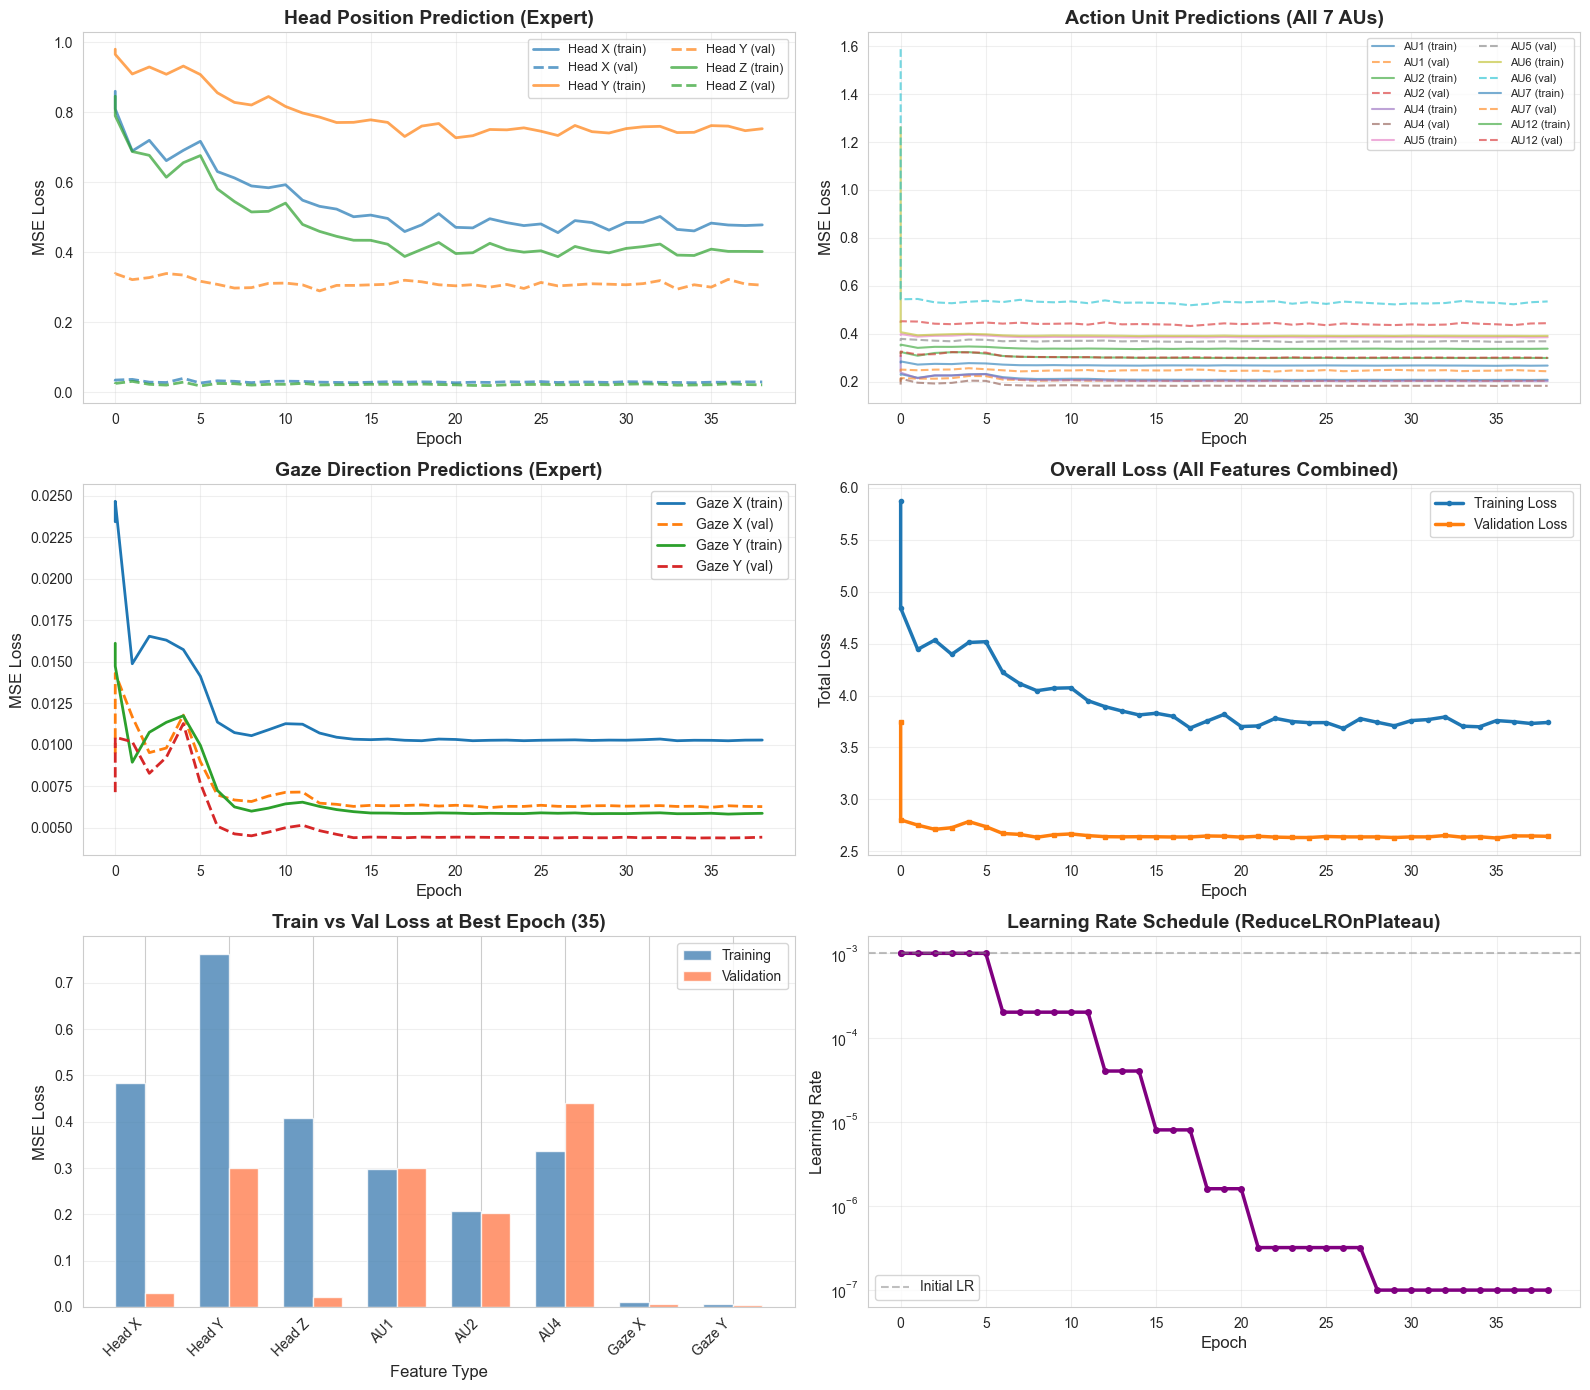

In [75]:
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

rotation_cols = ['tf.identity_loss', 'tf.identity_1_loss', 'tf.identity_2_loss']
val_rotation_cols = ['val_tf.identity_loss', 'val_tf.identity_1_loss', 'val_tf.identity_2_loss']
rotation_names = ['Head X', 'Head Y', 'Head Z']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, (train_col, val_col, name, color) in enumerate(zip(rotation_cols, val_rotation_cols, rotation_names, colors)):
    axes[0, 0].plot(history['epoch'], history[train_col], label=f'{name} (train)', 
                    linewidth=2, color=color, alpha=0.7)
    axes[0, 0].plot(history['epoch'], history[val_col], label=f'{name} (val)', 
                    linewidth=2, color=color, linestyle='--', alpha=0.7)

axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('MSE Loss', fontsize=12)
axes[0, 0].set_title('Head Position Prediction (Expert)', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=9, ncol=2)
axes[0, 0].grid(True, alpha=0.3)

au_names = ['AU1', 'AU2', 'AU4', 'AU5', 'AU6', 'AU7', 'AU12']
au_train_cols = [col for col in history.columns if 'squeeze' in col and 'val' not in col]
au_val_cols = [col for col in history.columns if 'squeeze' in col and 'val' in col]

for i, (train_col, val_col) in enumerate(zip(au_train_cols, au_val_cols)):
    label = au_names[i] if i < len(au_names) else f'AU{i+1}'
    axes[0, 1].plot(history['epoch'], history[train_col], label=f'{label} (train)', alpha=0.6, linewidth=1.5)
    axes[0, 1].plot(history['epoch'], history[val_col], label=f'{label} (val)', linestyle='--', alpha=0.6, linewidth=1.5)

axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('MSE Loss', fontsize=12)
axes[0, 1].set_title('Action Unit Predictions (All 7 AUs)', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=8, ncol=2, loc='upper right')
axes[0, 1].grid(True, alpha=0.3)

gaze_train = ['tf.identity_3_loss', 'tf.identity_4_loss']
gaze_val = ['val_tf.identity_3_loss', 'val_tf.identity_4_loss']
gaze_names = ['Gaze X', 'Gaze Y']

for train_col, val_col, name in zip(gaze_train, gaze_val, gaze_names):
    axes[1, 0].plot(history['epoch'], history[train_col], label=f'{name} (train)', linewidth=2)
    axes[1, 0].plot(history['epoch'], history[val_col], label=f'{name} (val)', linewidth=2, linestyle='--')

axes[1, 0].set_xlabel('Epoch', fontsize=12)
axes[1, 0].set_ylabel('MSE Loss', fontsize=12)
axes[1, 0].set_title('Gaze Direction Predictions (Expert)', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(history['epoch'], history['loss'], label='Training Loss', linewidth=2.5, marker='o', markersize=3)
axes[1, 1].plot(history['epoch'], history['val_loss'], label='Validation Loss', linewidth=2.5, marker='s', markersize=3)
axes[1, 1].set_xlabel('Epoch', fontsize=12)
axes[1, 1].set_ylabel('Total Loss', fontsize=12)
axes[1, 1].set_title('Overall Loss (All Features Combined)', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

best_epoch_data = history.loc[history['val_loss'].idxmin()]
feature_types = ['Head X', 'Head Y', 'Head Z', 'AU1', 'AU2', 'AU4', 'Gaze X', 'Gaze Y']
train_losses = [
    best_epoch_data['tf.identity_loss'],
    best_epoch_data['tf.identity_1_loss'],
    best_epoch_data['tf.identity_2_loss'],
    best_epoch_data['tf.compat.v1.squeeze_loss'],
    best_epoch_data['tf.compat.v1.squeeze_1_loss'],
    best_epoch_data['tf.compat.v1.squeeze_2_loss'],
    best_epoch_data['tf.identity_3_loss'],
    best_epoch_data['tf.identity_4_loss']
]
val_losses = [
    best_epoch_data['val_tf.identity_loss'],
    best_epoch_data['val_tf.identity_1_loss'],
    best_epoch_data['val_tf.identity_2_loss'],
    best_epoch_data['val_tf.compat.v1.squeeze_loss'],
    best_epoch_data['val_tf.compat.v1.squeeze_1_loss'],
    best_epoch_data['val_tf.compat.v1.squeeze_2_loss'],
    best_epoch_data['val_tf.identity_3_loss'],
    best_epoch_data['val_tf.identity_4_loss']
]

x = np.arange(len(feature_types))
width = 0.35

axes[2, 0].bar(x - width/2, train_losses, width, label='Training', alpha=0.8, color='steelblue')
axes[2, 0].bar(x + width/2, val_losses, width, label='Validation', alpha=0.8, color='coral')
axes[2, 0].set_xlabel('Feature Type', fontsize=12)
axes[2, 0].set_ylabel('MSE Loss', fontsize=12)
axes[2, 0].set_title(f'Train vs Val Loss at Best Epoch ({int(best_epoch_data["epoch"])})', fontsize=14, fontweight='bold')
axes[2, 0].set_xticks(x)
axes[2, 0].set_xticklabels(feature_types, rotation=45, ha='right')
axes[2, 0].legend(fontsize=10)
axes[2, 0].grid(True, alpha=0.3, axis='y')

if 'lr' in history.columns:
    axes[2, 1].plot(history['epoch'], history['lr'], linewidth=2.5, color='purple', marker='o', markersize=4)
    axes[2, 1].set_xlabel('Epoch', fontsize=12)
    axes[2, 1].set_ylabel('Learning Rate', fontsize=12)
    axes[2, 1].set_title('Learning Rate Schedule (ReduceLROnPlateau)', fontsize=14, fontweight='bold')
    axes[2, 1].set_yscale('log')
    axes[2, 1].grid(True, alpha=0.3)
    axes[2, 1].axhline(y=0.001, color='gray', linestyle='--', alpha=0.5, label='Initial LR')
    axes[2, 1].legend()

plt.tight_layout()
plt.show()

## 4. Load and Visualize Sample Predictions

Load the trained model and make predictions on validation data.

In [76]:
import tensorflow as tf
from utils.ASAP_utils import build_model, load_training_data
import glob
import os

data_path = 'data/processed'
[xij_tr, yij_tr, xij_val, yij_val] = load_training_data(data_path)

print(f"Training data: {xij_tr.shape}")
print(f"Validation data: {xij_val.shape}")

params_config = {'nb_inputs': 56, 'in_seq_len': 100}
params_model = {
    'cell_multiheadatt': 16*4,
    'num_head_multiheadatt': 4,
    'pruning_stat': True,
    'cell_lstm': 20,
    'cell_dense': 20,
}
model = build_model(params_config, params_model)

best_epoch_data = history.loc[history['val_loss'].idxmin()]
best_epoch_num = int(best_epoch_data['epoch']) + 1  
weight_path = f'trainedASAP/weights/best_weights-{best_epoch_num}.hdf5'

if not os.path.exists(weight_path):
    print(f"Warning: best_weights-{best_epoch_num}.hdf5 not found, using latest weights")
    weight_files = glob.glob('trainedASAP/weights/best_weights-*.hdf5')
    if weight_files:
        weight_files.sort(key=lambda x: int(x.split('-')[1].split('.')[0]))
        weight_path = weight_files[-1]
    else:
        raise FileNotFoundError("No weight files found!")

model.load_weights(weight_path)
epoch_num = int(weight_path.split('-')[1].split('.')[0])
print(f"Loaded weights from epoch {epoch_num}")

Training data: (484436, 100, 56)
Validation data: (126475, 100, 56)
Loaded weights from epoch 36


In [77]:
print("Finding most expressive validation sequences...")

sequence_variances = []
for i in range(min(1000, len(xij_val))):        # Check first 1000 sequences
    total_var = yij_val[i].var(axis=0).sum()
    sequence_variances.append((i, total_var))

sequence_variances.sort(key=lambda x: x[1], reverse=True)

print("\nTop 5 most expressive sequences:")
for rank, (idx, var) in enumerate(sequence_variances[:5]):
    print(f"  {rank+1}. Sequence {idx}: variance={var:.2f}")

sample_idx = sequence_variances[0][0]
print(f"\nSelected sequence {sample_idx} for visualization (total variance: {sequence_variances[0][1]:.2f})")

sample_input = xij_val[sample_idx:sample_idx+1]
predictions = model.predict(sample_input, verbose=0)
ground_truth = yij_val[sample_idx]

print(f"Model outputs: {len(predictions)}, Ground truth shape: {ground_truth.shape}")

print(f"\nAU activity in selected sequence:")
au_names = ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU12']
au_indices = [3, 4, 5, 6, 7, 8, 9]

for name, idx in zip(au_names, au_indices):
    seq_vals = ground_truth[:, idx]
    is_active = "active" if seq_vals.std() > 0.1 else "flat"
    print(f"  {name}: std={seq_vals.std():.4f} ({is_active})")

Finding most expressive validation sequences...

Top 5 most expressive sequences:
  1. Sequence 93: variance=12.01
  2. Sequence 94: variance=11.98
  3. Sequence 95: variance=11.93
  4. Sequence 92: variance=11.91
  5. Sequence 96: variance=11.86

Selected sequence 93 for visualization (total variance: 12.01)
Model outputs: 12, Ground truth shape: (100, 24)

AU activity in selected sequence:
  AU01: std=2.4326 (active)
  AU02: std=1.5699 (active)
  AU04: std=0.3025 (active)
  AU05: std=1.2150 (active)
  AU06: std=0.4877 (active)
  AU07: std=0.7484 (active)
  AU12: std=0.4644 (active)


/Users/kutubyi/Documents/GitHub/ASAP-NoXi/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/kutubyi/Documents/GitHub/ASAP-NoXi/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


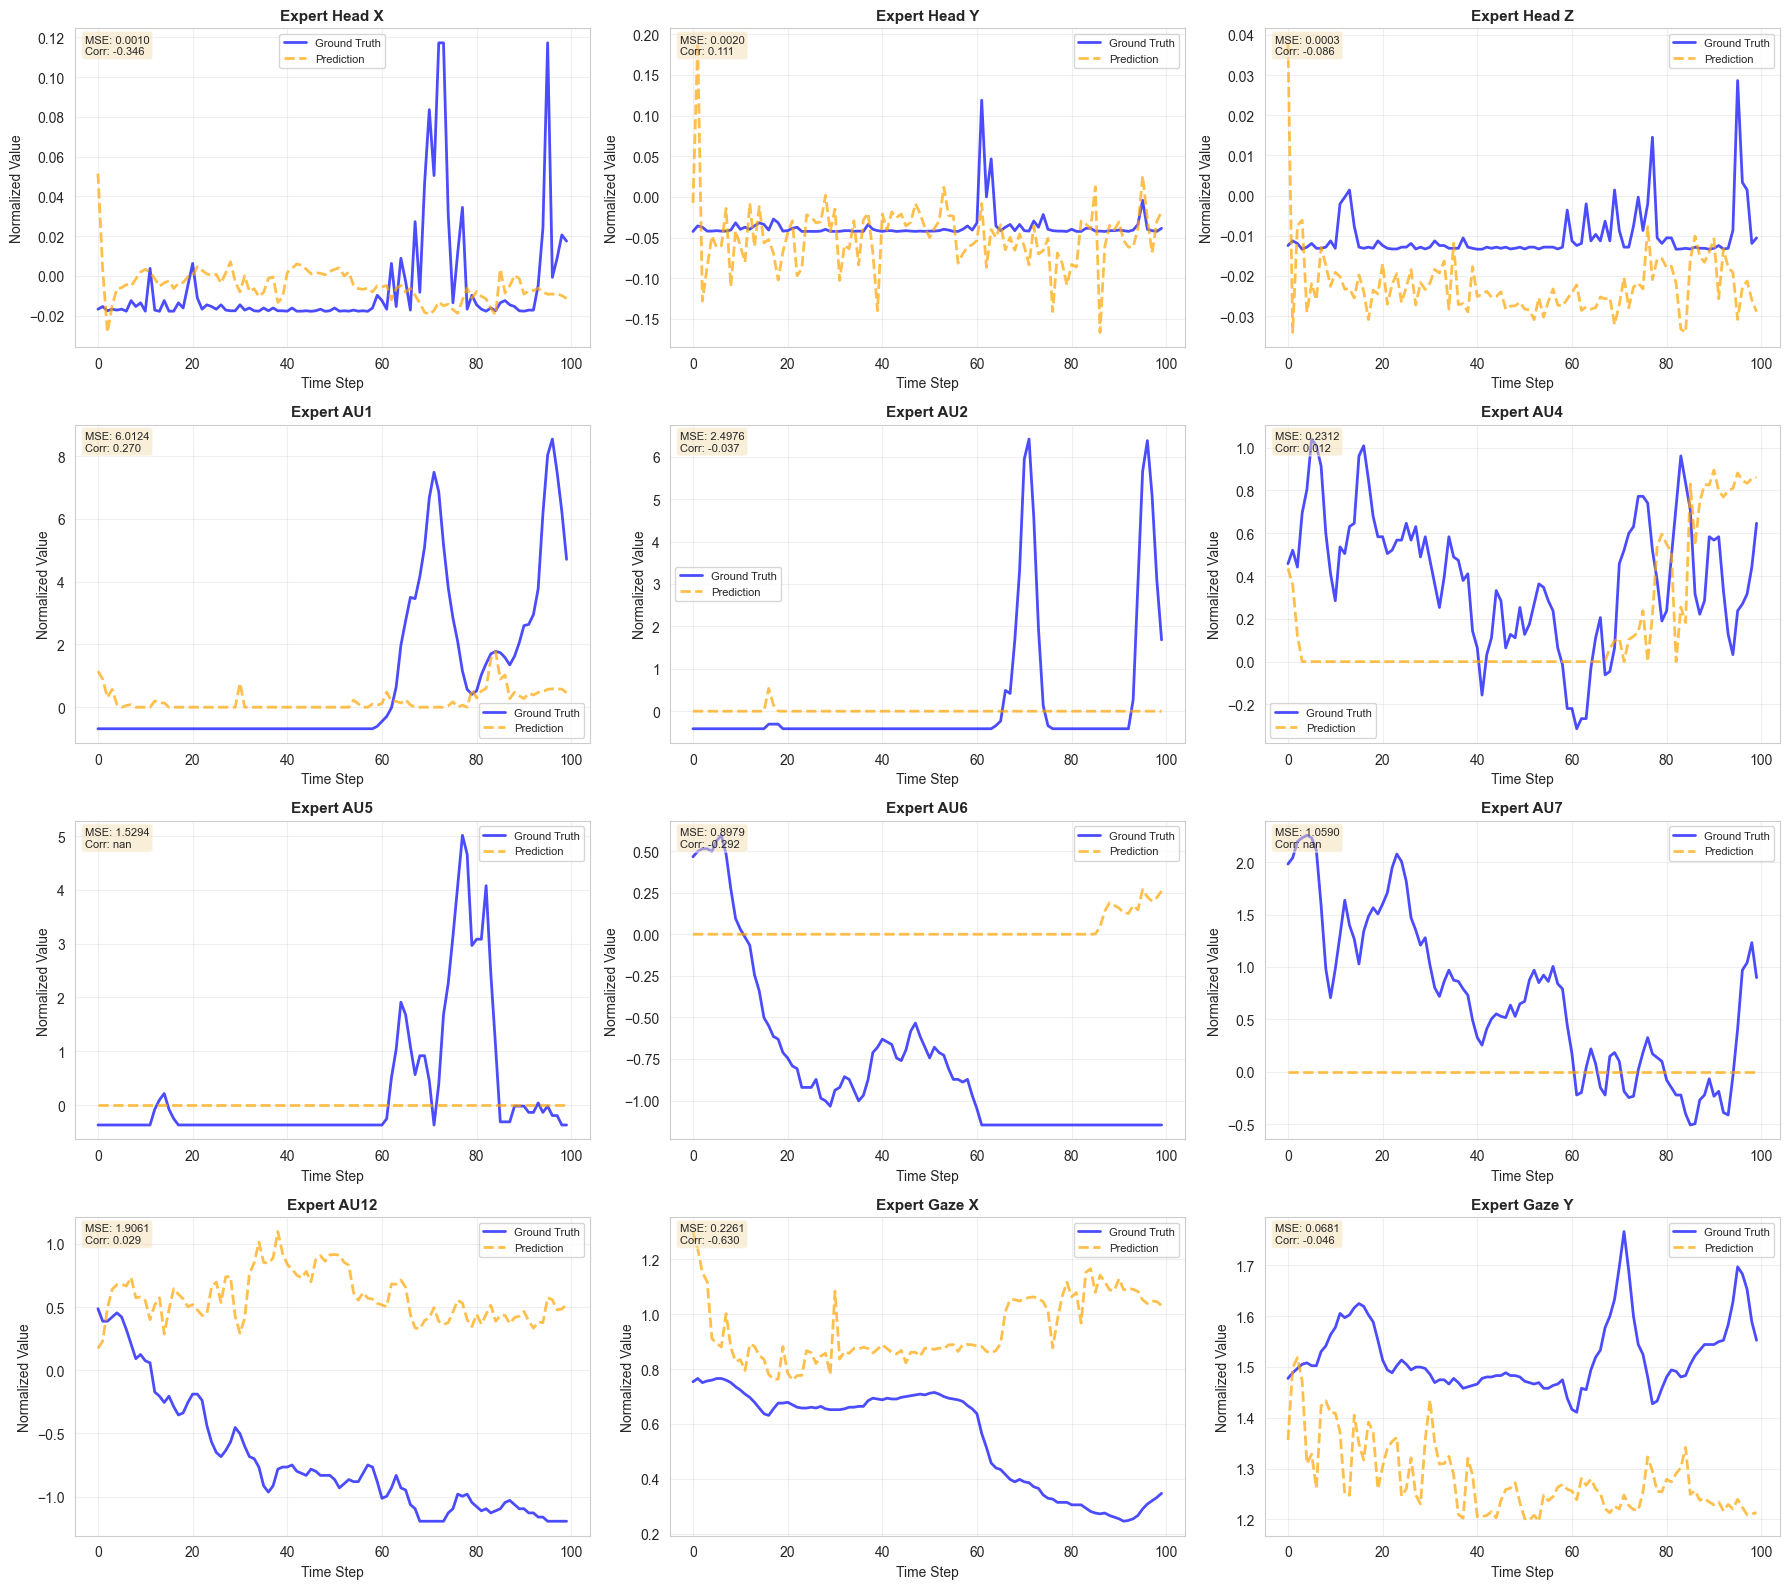


PREDICTION QUALITY METRICS
Expert Head X       : MSE=0.0010, MAE=0.0200, Corr=-0.346
Expert Head Y       : MSE=0.0020, MAE=0.0309, Corr=0.111
Expert Head Z       : MSE=0.0003, MAE=0.0133, Corr=-0.086
Expert AU1          : MSE=6.0124, MAE=1.6024, Corr=0.270
Expert AU2          : MSE=2.4976, MAE=0.8477, Corr=-0.037
Expert AU4          : MSE=0.2312, MAE=0.4107, Corr=0.012
Expert AU5          : MSE=1.5294, MAE=0.7174, Corr=nan
Expert AU6          : MSE=0.8979, MAE=0.8891, Corr=-0.292
Expert AU7          : MSE=1.0590, MAE=0.8132, Corr=nan
Expert AU12         : MSE=1.9061, MAE=1.2975, Corr=0.029
Expert Gaze X       : MSE=0.2261, MAE=0.3895, Corr=-0.630
Expert Gaze Y       : MSE=0.0681, MAE=0.2416, Corr=-0.046


In [78]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

feature_names = [
    'Expert Head X', 'Expert Head Y', 'Expert Head Z',
    'Expert AU1', 'Expert AU2', 'Expert AU4', 'Expert AU5', 
    'Expert AU6', 'Expert AU7', 'Expert AU12',
    'Expert Gaze X', 'Expert Gaze Y',
]

time_steps = np.arange(100)

for i in range(12):
    ax = axes[i]
    
    pred = predictions[i][0]  
    gt = ground_truth[:, i] 
    
    ax.plot(time_steps, gt, label='Ground Truth', linewidth=2, alpha=0.7, color='blue')
    ax.plot(time_steps, pred, label='Prediction', linewidth=2, alpha=0.7, linestyle='--', color='orange')
    ax.set_xlabel('Time Step', fontsize=10)
    ax.set_ylabel('Normalized Value', fontsize=10)
    ax.set_title(f'{feature_names[i]}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    
    mse = np.mean((pred - gt) ** 2)
    corr = np.corrcoef(pred, gt)[0, 1]
    ax.text(0.02, 0.98, f'MSE: {mse:.4f}\nCorr: {corr:.3f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nPREDICTION QUALITY METRICS")
for i, name in enumerate(feature_names):
    pred = predictions[i][0]
    gt = ground_truth[:, i]
    mse = np.mean((pred - gt) ** 2)
    mae = np.mean(np.abs(pred - gt))
    corr = np.corrcoef(pred, gt)[0, 1]
    print(f"{name:20s}: MSE={mse:.4f}, MAE={mae:.4f}, Corr={corr:.3f}")